<a href="https://colab.research.google.com/github/GabrielCdev/ANAC_BigData_Analysis/blob/main/ANAC_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da base de voos registrados pela ANAC (2021)

....:::: Membros ::::....

Gabriel Calheiros

Izadora Paim

Laianne Protasio

#Objetivo
O objetivo central desta análise é compreender o volume de voos, bem como seus status de execução, atrasos e cancelamentos no ano 2021, após o início dos decretos de enfrentamento à pandemia no Brasil (lockdown - 2020).

# Carregamento e pré-análise do dataset

##Importação de Dados

In [ ]:
# Importação de bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurações para os gráficos
pd.set_option("display.precision", 2)
sns.set_style("whitegrid")

In [ ]:
# Carga dos dados .csv
anac_jan = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_01_2021.csv', sep=';')
anac_feb = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_02_2021.csv', sep=';')
anac_mar = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_03_2021.csv', sep=';')
anac_apr = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_04_2021.csv', sep=';')
anac_may = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_05_2021.csv', sep=';')
anac_jun = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_06_2021.csv', sep=';')
anac_jul = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_07_2021.csv', sep=';')
anac_aug = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_08_2021.csv', sep=';')
anac_sep = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_09_2021.csv', sep=';')
anac_oct = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_10_2021.csv', sep=';')
anac_nov = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_11_2021.csv', sep=';')
anac_dec = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/ANAC_BigData_Analysis/main/Dataset/vra_12_2021.csv', sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Análise primária

In [ ]:
#Verificando início das datas
anac_jan.head(5)

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Situacao Voo
0,AAL,904,0,X,SBGL,KMIA,01/01/2021 23:35,01/01/2021 23:29,02/01/2021 08:10,02/01/2021 07:56,REALIZADO
1,AAL,904,0,X,SBGL,KMIA,02/01/2021 23:35,02/01/2021 23:34,03/01/2021 08:10,03/01/2021 08:14,REALIZADO
2,AAL,904,0,X,SBGL,KMIA,03/01/2021 23:35,03/01/2021 23:27,04/01/2021 08:10,04/01/2021 07:57,REALIZADO
3,AAL,904,0,X,SBGL,KMIA,04/01/2021 23:45,04/01/2021 23:38,05/01/2021 08:20,05/01/2021 07:51,REALIZADO
4,AAL,904,0,X,SBGL,KMIA,05/01/2021 23:45,05/01/2021 23:34,06/01/2021 08:20,06/01/2021 08:12,REALIZADO


In [ ]:
#Verificando final das datas
anac_dec.tail(5)

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Situacao Voo
71774,UPS,445,0,X,SBKP,KMIA,12/12/2021 11:55,12/12/2021 20:05,12/12/2021 19:50,13/12/2021 04:18,REALIZADO
71775,UPS,445,0,X,SBKP,KMIA,19/12/2021 11:55,20/12/2021 08:47,19/12/2021 19:50,20/12/2021 16:38,REALIZADO
71776,VDA,5596,9,X,KIAH,MPTO,08/12/2021 16:00,08/12/2021 16:10,08/12/2021 21:30,08/12/2021 21:40,REALIZADO
71777,VDA,5596,9,X,MPTO,SBCB,09/12/2021 12:00,09/12/2021 08:36,09/12/2021 20:00,09/12/2021 15:48,REALIZADO
71778,VDA,5597,9,X,SBCB,GOBD,10/12/2021 09:00,10/12/2021 12:57,10/12/2021 16:00,10/12/2021 19:28,REALIZADO


In [ ]:
# União de todos os arquivos em um só
anac_annual_df = anac_jan.append([anac_feb, anac_mar, anac_apr, anac_may, anac_jun, anac_jul, anac_aug, anac_sep, anac_oct, anac_nov, anac_dec], ignore_index=True)
anac_annual_df

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Situacao Voo
0,AAL,904,0,X,SBGL,KMIA,01/01/2021 23:35,01/01/2021 23:29,02/01/2021 08:10,02/01/2021 07:56,REALIZADO
1,AAL,904,0,X,SBGL,KMIA,02/01/2021 23:35,02/01/2021 23:34,03/01/2021 08:10,03/01/2021 08:14,REALIZADO
2,AAL,904,0,X,SBGL,KMIA,03/01/2021 23:35,03/01/2021 23:27,04/01/2021 08:10,04/01/2021 07:57,REALIZADO
3,AAL,904,0,X,SBGL,KMIA,04/01/2021 23:45,04/01/2021 23:38,05/01/2021 08:20,05/01/2021 07:51,REALIZADO
4,AAL,904,0,X,SBGL,KMIA,05/01/2021 23:45,05/01/2021 23:34,06/01/2021 08:20,06/01/2021 08:12,REALIZADO
...,...,...,...,...,...,...,...,...,...,...,...
609796,UPS,445,0,X,SBKP,KMIA,12/12/2021 11:55,12/12/2021 20:05,12/12/2021 19:50,13/12/2021 04:18,REALIZADO
609797,UPS,445,0,X,SBKP,KMIA,19/12/2021 11:55,20/12/2021 08:47,19/12/2021 19:50,20/12/2021 16:38,REALIZADO
609798,VDA,5596,9,X,KIAH,MPTO,08/12/2021 16:00,08/12/2021 16:10,08/12/2021 21:30,08/12/2021 21:40,REALIZADO
609799,VDA,5596,9,X,MPTO,SBCB,09/12/2021 12:00,09/12/2021 08:36,09/12/2021 20:00,09/12/2021 15:48,REALIZADO


##Informações Gerais

In [ ]:
anac_annual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609801 entries, 0 to 609800
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ICAO Empresa Aerea      609801 non-null  object
 1   Numero Voo              609801 non-null  object
 2   Codigo DI               609801 non-null  object
 3   Codigo Tipo Linha       607651 non-null  object
 4   ICAO Aerodromo Origem   609801 non-null  object
 5   ICAO Aerodromo Destino  609801 non-null  object
 6   Partida Prevista        608708 non-null  object
 7   Partida Real            579866 non-null  object
 8   Chegada Prevista        608708 non-null  object
 9   Chegada Real            579866 non-null  object
 10  Situacao Voo            609801 non-null  object
dtypes: object(11)
memory usage: 51.2+ MB


A respeito do banco de dados até aqui podemos concluir:

1.   O Dataset possui 11 atributos e 609801 linhas em sua maioria;
2.   Não existem dados nulos, mas não quer dizer que não existam dados ausentes;
3.   Todos os atributos são do tipo objeto, sendo necessário posterior avaliação e transformação de cada um.

# Filtragem e Padronização de Dados

##Conversão do tipo de dados do dataset

In [ ]:
anac_annual_df['ICAO Empresa Aerea'] = anac_annual_df['ICAO Empresa Aerea'].astype('category')
anac_annual_df['Numero Voo'] = anac_annual_df['Numero Voo'].astype('category')
anac_annual_df['Codigo DI'] = anac_annual_df['Codigo DI'].astype('category')
anac_annual_df['Codigo Tipo Linha'] = anac_annual_df['Codigo Tipo Linha'].astype('category')
anac_annual_df['ICAO Aerodromo Origem'] = anac_annual_df['ICAO Aerodromo Origem'].astype('category')
anac_annual_df['ICAO Aerodromo Destino'] = anac_annual_df['ICAO Aerodromo Destino'].astype('category')
anac_annual_df['Partida Prevista'] = anac_annual_df['Partida Prevista'].astype('datetime64[ns]')
anac_annual_df['Partida Real'] = pd.to_datetime(anac_annual_df['Partida Real'], errors = 'coerce')
anac_annual_df['Chegada Prevista'] = anac_annual_df['Chegada Prevista'].astype('datetime64[ns]')
anac_annual_df['Chegada Real'] = anac_annual_df['Chegada Real'].astype('datetime64[ns]')
anac_annual_df['Situacao Voo'] = anac_annual_df['Situacao Voo'].astype('category')

In [ ]:
#Confirmando tipo de dados
anac_annual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609801 entries, 0 to 609800
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ICAO Empresa Aerea      609801 non-null  category      
 1   Numero Voo              609801 non-null  category      
 2   Codigo DI               609801 non-null  category      
 3   Codigo Tipo Linha       607651 non-null  category      
 4   ICAO Aerodromo Origem   609801 non-null  category      
 5   ICAO Aerodromo Destino  609801 non-null  category      
 6   Partida Prevista        608708 non-null  datetime64[ns]
 7   Partida Real            579865 non-null  datetime64[ns]
 8   Chegada Prevista        608708 non-null  datetime64[ns]
 9   Chegada Real            579866 non-null  datetime64[ns]
 10  Situacao Voo            609801 non-null  category      
dtypes: category(7), datetime64[ns](4)
memory usage: 24.6 MB


##Criação de novas colunas

In [ ]:
# Colunas criadas para segregação das colunas do tipo datetime, visando viabilizar as análises
anac_annual_df['Dia_PP'] = anac_annual_df['Partida Prevista'].dt.day
anac_annual_df['Mes_PP'] = anac_annual_df['Partida Prevista'].dt.month
anac_annual_df['Ano_PP'] = anac_annual_df['Partida Prevista'].dt.year
anac_annual_df['DOW_PP'] = anac_annual_df['Partida Prevista'].dt.dayofweek

anac_annual_df['Dia_PR'] = anac_annual_df['Partida Real'].dt.day
anac_annual_df['Mes_PR'] = anac_annual_df['Partida Real'].dt.month
anac_annual_df['Ano_PR'] = anac_annual_df['Partida Real'].dt.year
anac_annual_df['DOW_PR'] = anac_annual_df['Partida Real'].dt.dayofweek

anac_annual_df['Dia_CP'] = anac_annual_df['Chegada Prevista'].dt.day
anac_annual_df['Mes_CP'] = anac_annual_df['Chegada Prevista'].dt.month
anac_annual_df['Ano_CP'] = anac_annual_df['Chegada Prevista'].dt.year
anac_annual_df['DOW_CP'] = anac_annual_df['Chegada Prevista'].dt.dayofweek

anac_annual_df['Dia_CR'] = anac_annual_df['Chegada Real'].dt.day
anac_annual_df['Mes_CR'] = anac_annual_df['Chegada Real'].dt.month
anac_annual_df['Ano_CR'] = anac_annual_df['Chegada Real'].dt.year
anac_annual_df['DOW_CR'] = anac_annual_df['Chegada Real'].dt.dayofweek

In [ ]:
# Verificando as novas colunas criadas
anac_annual_df.columns

Index(['ICAO Empresa Aerea', 'Numero Voo', 'Codigo DI', 'Codigo Tipo Linha',
       'ICAO Aerodromo Origem', 'ICAO Aerodromo Destino', 'Partida Prevista',
       'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situacao Voo',
       'Dia_PP', 'Mes_PP', 'Ano_PP', 'DOW_PP', 'Dia_PR', 'Mes_PR', 'Ano_PR',
       'DOW_PR', 'Dia_CP', 'Mes_CP', 'Ano_CP', 'DOW_CP', 'Dia_CR', 'Mes_CR',
       'Ano_CR', 'DOW_CR'],
      dtype='object')

In [ ]:
# Validando o datatype das novas colunas
anac_annual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609801 entries, 0 to 609800
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ICAO Empresa Aerea      609801 non-null  category      
 1   Numero Voo              609801 non-null  category      
 2   Codigo DI               609801 non-null  category      
 3   Codigo Tipo Linha       607651 non-null  category      
 4   ICAO Aerodromo Origem   609801 non-null  category      
 5   ICAO Aerodromo Destino  609801 non-null  category      
 6   Partida Prevista        608708 non-null  datetime64[ns]
 7   Partida Real            579865 non-null  datetime64[ns]
 8   Chegada Prevista        608708 non-null  datetime64[ns]
 9   Chegada Real            579866 non-null  datetime64[ns]
 10  Situacao Voo            609801 non-null  category      
 11  Dia_PP                  608708 non-null  float64       
 12  Mes_PP                  608708

## Categorização dos novos dados

In [ ]:
anac_annual_df['Dia_PP'] = anac_annual_df['Dia_PP'].astype('Int64')
anac_annual_df['Mes_PP'] = anac_annual_df['Mes_PP'].astype('Int64')
anac_annual_df['Ano_PP'] = anac_annual_df['Ano_PP'].astype('Int64')
anac_annual_df['DOW_PP'] = anac_annual_df['DOW_PP'].astype('category')

anac_annual_df['Dia_PR'] = anac_annual_df['Dia_PR'].astype('Int64')
anac_annual_df['Mes_PR'] = anac_annual_df['Mes_PR'].astype('Int64')
anac_annual_df['Ano_PR'] = anac_annual_df['Ano_PR'].astype('Int64')
anac_annual_df['DOW_PR'] = anac_annual_df['DOW_PR'].astype('category')

anac_annual_df['Dia_CP'] = anac_annual_df['Dia_CP'].astype('Int64')
anac_annual_df['Mes_CP'] = anac_annual_df['Mes_CP'].astype('Int64')
anac_annual_df['Ano_CP'] = anac_annual_df['Ano_CP'].astype('Int64')
anac_annual_df['DOW_CP'] = anac_annual_df['DOW_CP'].astype('category')

anac_annual_df['Dia_CR'] = anac_annual_df['Dia_CR'].astype('Int64')
anac_annual_df['Mes_CR'] = anac_annual_df['Mes_CR'].astype('Int64')
anac_annual_df['Ano_CR'] = anac_annual_df['Ano_CR'].astype('Int64')
anac_annual_df['DOW_CR'] = anac_annual_df['DOW_CR'].astype('category')

In [ ]:
# Validando o tipo de dados após conversão
anac_annual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609801 entries, 0 to 609800
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ICAO Empresa Aerea      609801 non-null  category      
 1   Numero Voo              609801 non-null  category      
 2   Codigo DI               609801 non-null  category      
 3   Codigo Tipo Linha       607651 non-null  category      
 4   ICAO Aerodromo Origem   609801 non-null  category      
 5   ICAO Aerodromo Destino  609801 non-null  category      
 6   Partida Prevista        608708 non-null  datetime64[ns]
 7   Partida Real            579865 non-null  datetime64[ns]
 8   Chegada Prevista        608708 non-null  datetime64[ns]
 9   Chegada Real            579866 non-null  datetime64[ns]
 10  Situacao Voo            609801 non-null  category      
 11  Dia_PP                  608708 non-null  Int64         
 12  Mes_PP                  608708

In [ ]:
# Análise do comportamento da tabela com as novas colunas
anac_annual_df.head()

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,...,Ano_PR,DOW_PR,Dia_CP,Mes_CP,Ano_CP,DOW_CP,Dia_CR,Mes_CR,Ano_CR,DOW_CR
0,AAL,904,0,X,SBGL,KMIA,2021-01-01 23:35:00,2021-01-01 23:29:00,2021-02-01 08:10:00,2021-02-01 07:56:00,...,2021,4.0,1,2,2021,0.0,1,2,2021,0.0
1,AAL,904,0,X,SBGL,KMIA,2021-02-01 23:35:00,2021-02-01 23:34:00,2021-03-01 08:10:00,2021-03-01 08:14:00,...,2021,0.0,1,3,2021,0.0,1,3,2021,0.0
2,AAL,904,0,X,SBGL,KMIA,2021-03-01 23:35:00,2021-03-01 23:27:00,2021-04-01 08:10:00,2021-04-01 07:57:00,...,2021,0.0,1,4,2021,3.0,1,4,2021,3.0
3,AAL,904,0,X,SBGL,KMIA,2021-04-01 23:45:00,2021-04-01 23:38:00,2021-05-01 08:20:00,2021-05-01 07:51:00,...,2021,3.0,1,5,2021,5.0,1,5,2021,5.0
4,AAL,904,0,X,SBGL,KMIA,2021-05-01 23:45:00,2021-05-01 23:34:00,2021-06-01 08:20:00,2021-06-01 08:12:00,...,2021,5.0,1,6,2021,1.0,1,6,2021,1.0


## Verificando o padrão de inputs

In [ ]:
# Verificando os dados retornados
anac_annual_df['Mes_CP'].unique()

<IntegerArray>
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, <NA>]
Length: 13, dtype: Int64

In [ ]:
# Analisando a forma que os dias da semana são plotados
anac_annual_df['DOW_CR'].unique()

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[0.0, 3.0, 5.0, 1.0, 6.0, 2.0, 4.0, NaN]
Categories (7, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [ ]:
# Realizando o replace de número para string nos dias da semana
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(0.0, 'Segunda-feira', inplace=True)
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(1.0, 'Terça-feira', inplace=True)
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(2.0, 'Quarta-feira', inplace=True)
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(3.0, 'Quinta-feira', inplace=True)
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(4.0, 'Sexta-feira', inplace=True)
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(5.0, 'Sábado', inplace=True)
anac_annual_df[['DOW_PP', 'DOW_PR', 'DOW_CP', 'DOW_CR']].replace(6.0, 'Domingo', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.8/dist-p

In [ ]:
anac_annual_df['Ano_CR'].unique()

<IntegerArray>
[2021, <NA>, 2202, 2022]
Length: 4, dtype: Int64

In [ ]:
# Analisando quantas vezes o ano "2202" se repete para garantir que foi um erro de INPUT
anac_annual_df.isin([2202]).sum()

ICAO Empresa Aerea        0
Numero Voo                0
Codigo DI                 0
Codigo Tipo Linha         0
ICAO Aerodromo Origem     0
ICAO Aerodromo Destino    0
Partida Prevista          0
Partida Real              0
Chegada Prevista          0
Chegada Real              0
Situacao Voo              0
Dia_PP                    0
Mes_PP                    0
Ano_PP                    0
DOW_PP                    0
Dia_PR                    0
Mes_PR                    0
Ano_PR                    0
DOW_PR                    0
Dia_CP                    0
Mes_CP                    0
Ano_CP                    0
DOW_CP                    0
Dia_CR                    0
Mes_CR                    0
Ano_CR                    1
DOW_CR                    0
dtype: int64

In [ ]:
# Verificando o padrão de data para definir qual ação tomar
anac_annual_df[anac_annual_df['Ano_CR'] == 2202]

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,...,Ano_PR,DOW_PR,Dia_CP,Mes_CP,Ano_CP,DOW_CP,Dia_CR,Mes_CR,Ano_CR,DOW_CR
76440,GEC,8265,0,X,SAEZ,EDDF,2021-02-18 00:45:00,2021-02-18 00:44:00,2021-02-18 14:20:00,2202-02-18 13:59:00,...,2021,Quinta-feira,18,2,2021,Quinta-feira,18,2,2202,Quinta-feira


In [ ]:
# Realizando o replace de 2202 para 2021
anac_annual_df['Ano_CR'].replace(2202, 2021, inplace=True)
anac_annual_df['Chegada Real'].replace('2202-02-18 13:59:00', '2021-02-18 13:59:00', inplace=True)

In [ ]:
# Verificando se a correção foi feita
anac_annual_df[anac_annual_df['Chegada Real'] == '2202-02-18 13:59:00']

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,...,Ano_PR,DOW_PR,Dia_CP,Mes_CP,Ano_CP,DOW_CP,Dia_CR,Mes_CR,Ano_CR,DOW_CR


In [ ]:
# Verificando os inputs para Situação do Voo
anac_annual_df['Situacao Voo'].unique()

['REALIZADO', 'CANCELADO', 'NíO INFORMADO', 'NÌO INFORMADO', 'NÃO INFORMADO']
Categories (5, object): ['CANCELADO', 'NÃO INFORMADO', 'NÌO INFORMADO', 'NíO INFORMADO',
                         'REALIZADO']

In [ ]:
# Realizando o replace dos dados para "NÃO INFORMADO"
anac_annual_df['Situacao Voo'].replace(['NíO INFORMADO', 'NÌO INFORMADO'], 'NÃO INFORMADO', inplace=True)

##Verificação de dados duplicados

In [ ]:
anac_annual_df[anac_annual_df.duplicated()]

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,...,Ano_PR,DOW_PR,Dia_CP,Mes_CP,Ano_CP,DOW_CP,Dia_CR,Mes_CR,Ano_CR,DOW_CR
588456,QTR,8157,0,G,SAEZ,SEQM,2021-12-17 05:45:00,NaT,2021-12-17 11:55:00,NaT,...,<NA>,NaN,17,12,2021,Sexta-feira,<NA>,<NA>,<NA>,NaN


## Remoção de dados duplicados

In [ ]:
anac_annual_df.drop_duplicates(inplace=True)

##Verificação de dados ausentes

In [ ]:
anac_annual_df.isnull().sum()

ICAO Empresa Aerea            0
Numero Voo                    0
Codigo DI                     0
Codigo Tipo Linha          2150
ICAO Aerodromo Origem         0
ICAO Aerodromo Destino        0
Partida Prevista           1093
Partida Real              29935
Chegada Prevista           1093
Chegada Real              29934
Situacao Voo                  0
Dia_PP                     1093
Mes_PP                     1093
Ano_PP                     1093
DOW_PP                     1093
Dia_PR                    29935
Mes_PR                    29935
Ano_PR                    29935
DOW_PR                    29935
Dia_CP                     1093
Mes_CP                     1093
Ano_CP                     1093
DOW_CP                     1093
Dia_CR                    29934
Mes_CR                    29934
Ano_CR                    29934
DOW_CR                    29934
dtype: int64

# Distribuição dos dados

In [ ]:
anac_annual_df.describe(include=['category'])

,ICAO Empresa Aerea,Numero Voo,Codigo DI,Codigo Tipo Linha,ICAO Aerodromo Origem,ICAO Aerodromo Destino,Situacao Voo,DOW_PP,DOW_PR,DOW_CP,DOW_CR
count,609800,609800,609800,607650,609800,609800,609800,608707,579865,608707,579866
unique,118,5717,18,5,314,311,3,7,7,7,7
top,AZU,4102,0,N,SBGR,SBGR,REALIZADO,Sexta-feira,Sexta-feira,Sexta-feira,Sexta-feira
freq,231932,876,338090,532582,88839,89985,579866,91095,86629,91171,86857


De modo geral:

A maioria dos voos foram realizados;

A empresa aérea com mais voos foi a empresa brasileira Azul;

O aeroporto com mais voos foi o de Guarulhos - GOVERNADOR ANDRÉ FRANCO MONTORO (SBGR);

Existem dados ausentes a respeito da Partida e Chegada;

Ao todo foram realizados 579866 voos no ano de 2021.

#Análise de Dados

##Voos em relação aos meses

Text(0.5, 0, 'Mês')

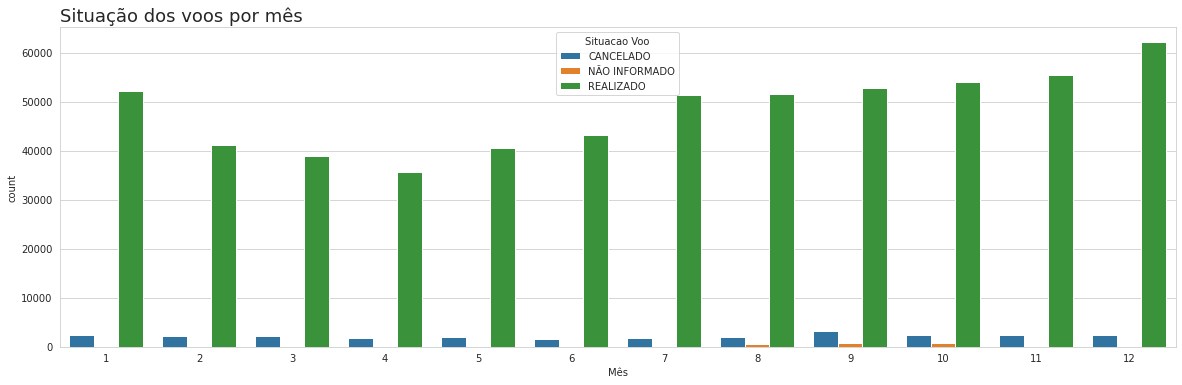

In [ ]:
anac_meses_df = anac_annual_df
anac_meses_df['Mes_PP'] = anac_meses_df['Mes_PP'].astype('category')

plt.figure(figsize=(20,20))
ax = plt.subplot(3,1,1)
ax.set_title('Situação dos voos por mês', fontsize=18, loc='left')
sns.countplot(x='Mes_PP', hue='Situacao Voo', data=anac_meses_df)
ax.set_xlabel("Mês")

##Situação dos voos

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


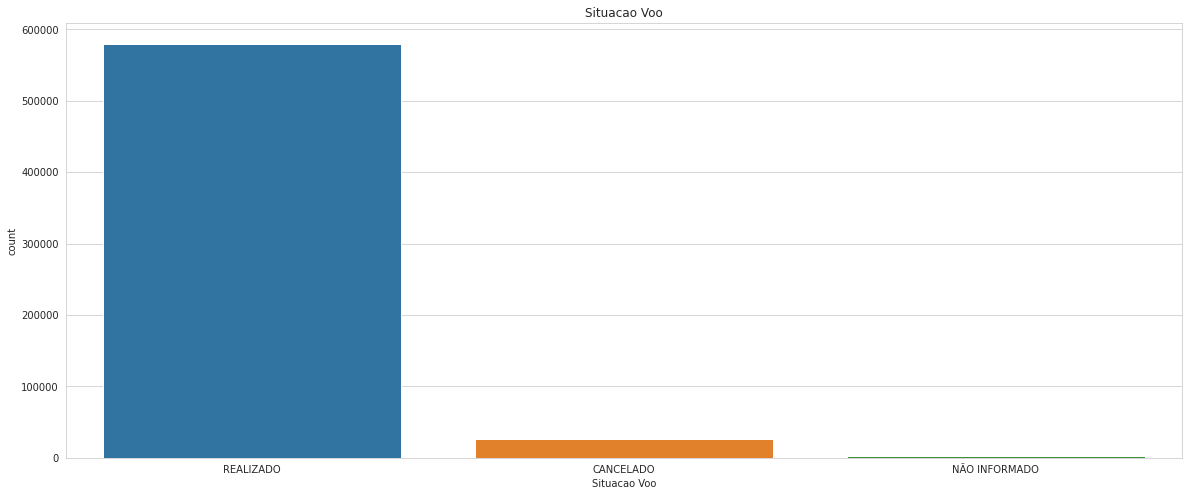

In [ ]:
f,ax=plt.subplots(figsize=(20,8))
sns.countplot('Situacao Voo',order = anac_annual_df['Situacao Voo'].value_counts().index, data=anac_annual_df,ax=ax)
ax.set_title('Situacao Voo')
plt.show()

## Voos cancelados por CIA

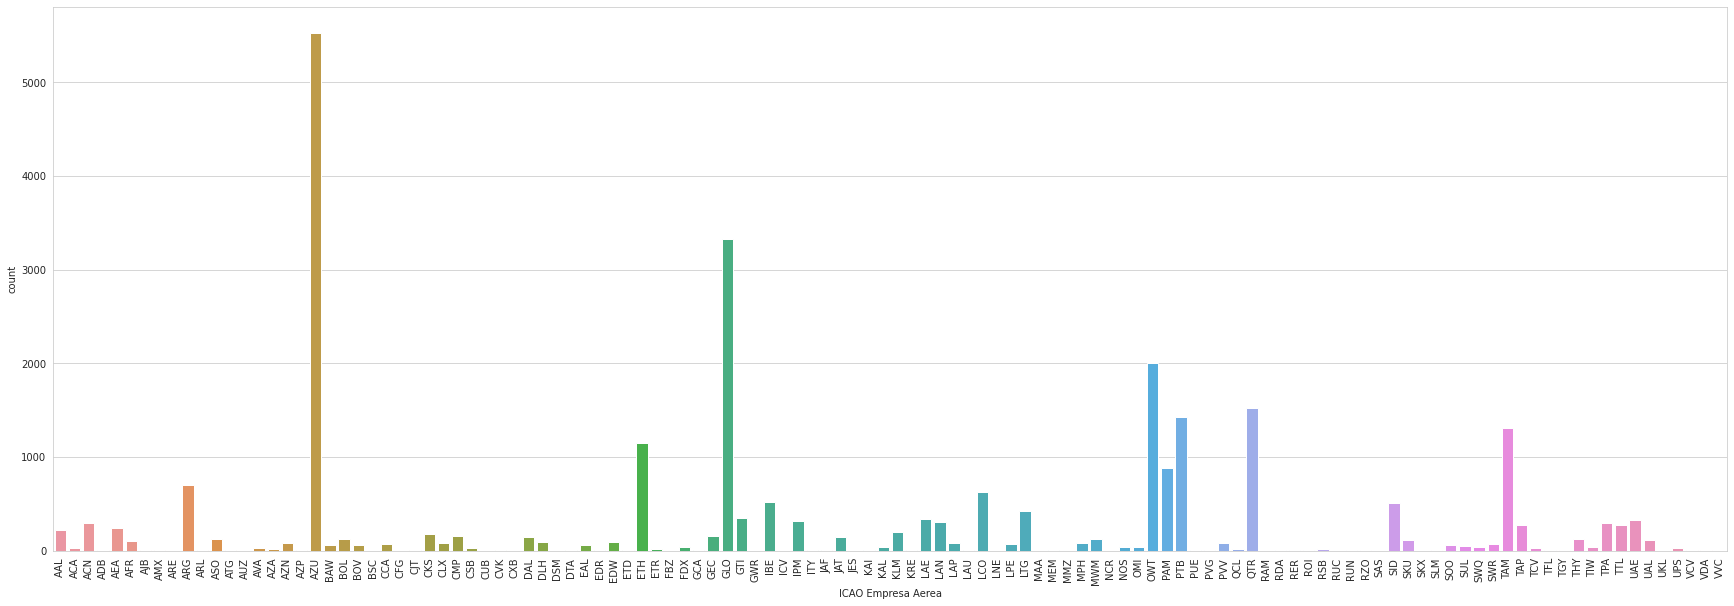

In [ ]:
Voos_cancelados = anac_annual_df[(anac_annual_df['Situacao Voo'] == 'CANCELADO')]

plt.figure(figsize=(30, 10))
ax = sns.countplot(x=Voos_cancelados['ICAO Empresa Aerea'], data=anac_annual_df)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

plt.show()

## Voos realizados por CIA

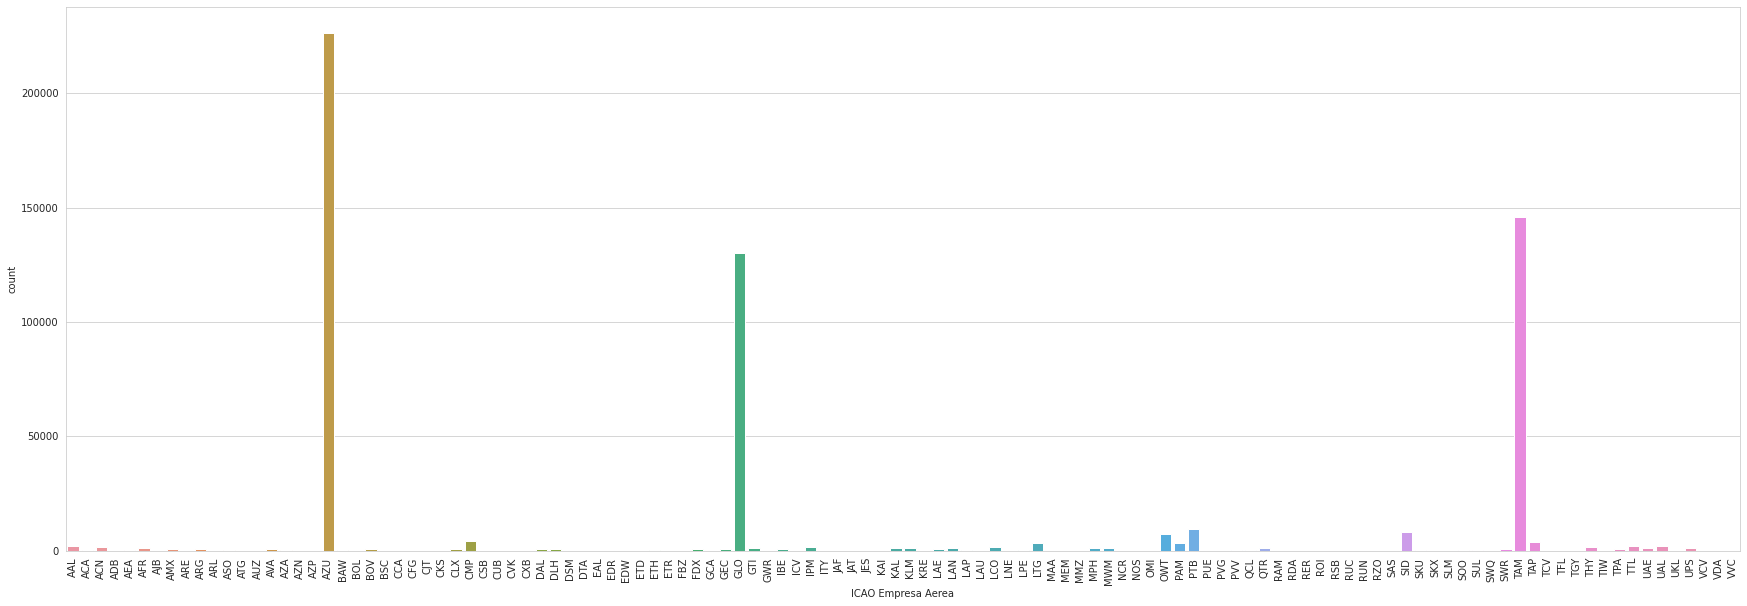

In [ ]:
Voos_realizados = anac_annual_df[(anac_annual_df['Situacao Voo'] == 'REALIZADO')]

plt.figure(figsize=(30, 10))
ax = sns.countplot(x=Voos_realizados['ICAO Empresa Aerea'], data=anac_annual_df)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

plt.show()

##Volume de voos por tipo de linha

In [ ]:
anac_annual_df['Codigo Tipo Linha'].value_counts().to_frame()

,Codigo Tipo Linha
N,532582
X,38432
C,17710
I,10899
G,8027


## Voos domésticos cancelados por aeroporto

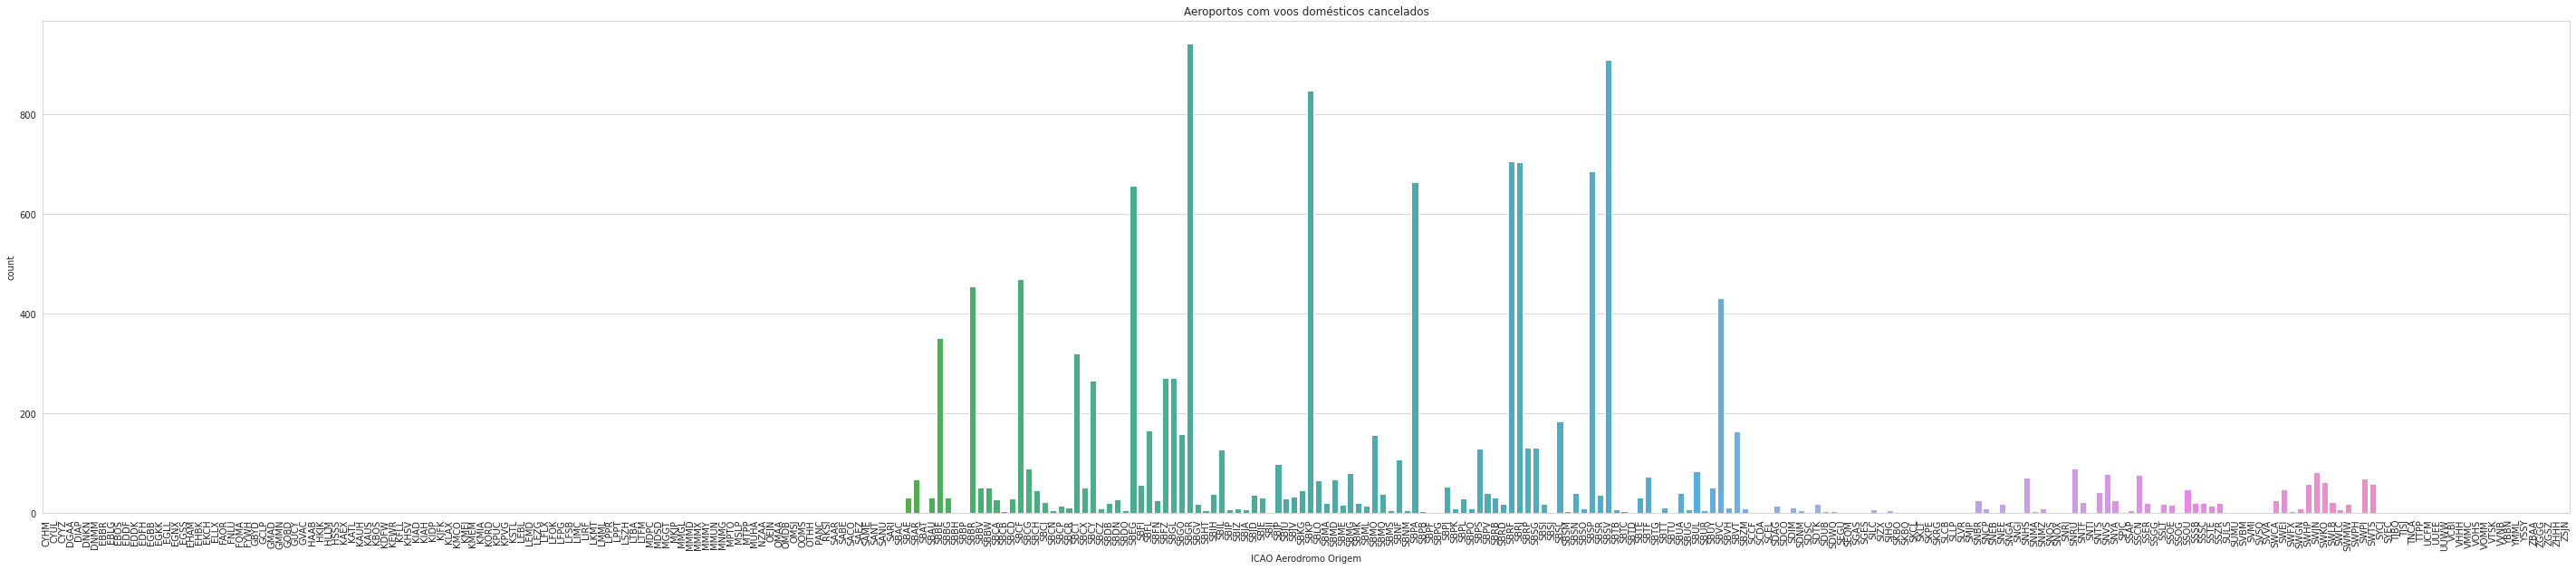

In [ ]:
anac_annual_df_sb_cancelled = anac_annual_df[(anac_annual_df['Codigo Tipo Linha'] == 'N') & (anac_annual_df['Situacao Voo']=='CANCELADO')]

plt.figure(figsize=(50, 10))
ax = sns.countplot(x='ICAO Aerodromo Origem', data=anac_annual_df_sb_cancelled)
ax.set_title('Aeroportos com voos domésticos cancelados')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

plt.show()

Aerodromos Origem com mais cancelamentos:

SBGR - Guarulhos (SP), BR

SBKP - Viracopos/Campinas (SP), BR

SBSV - Salvador (BA), BR

## Voos domésticos realizados por aeroporto

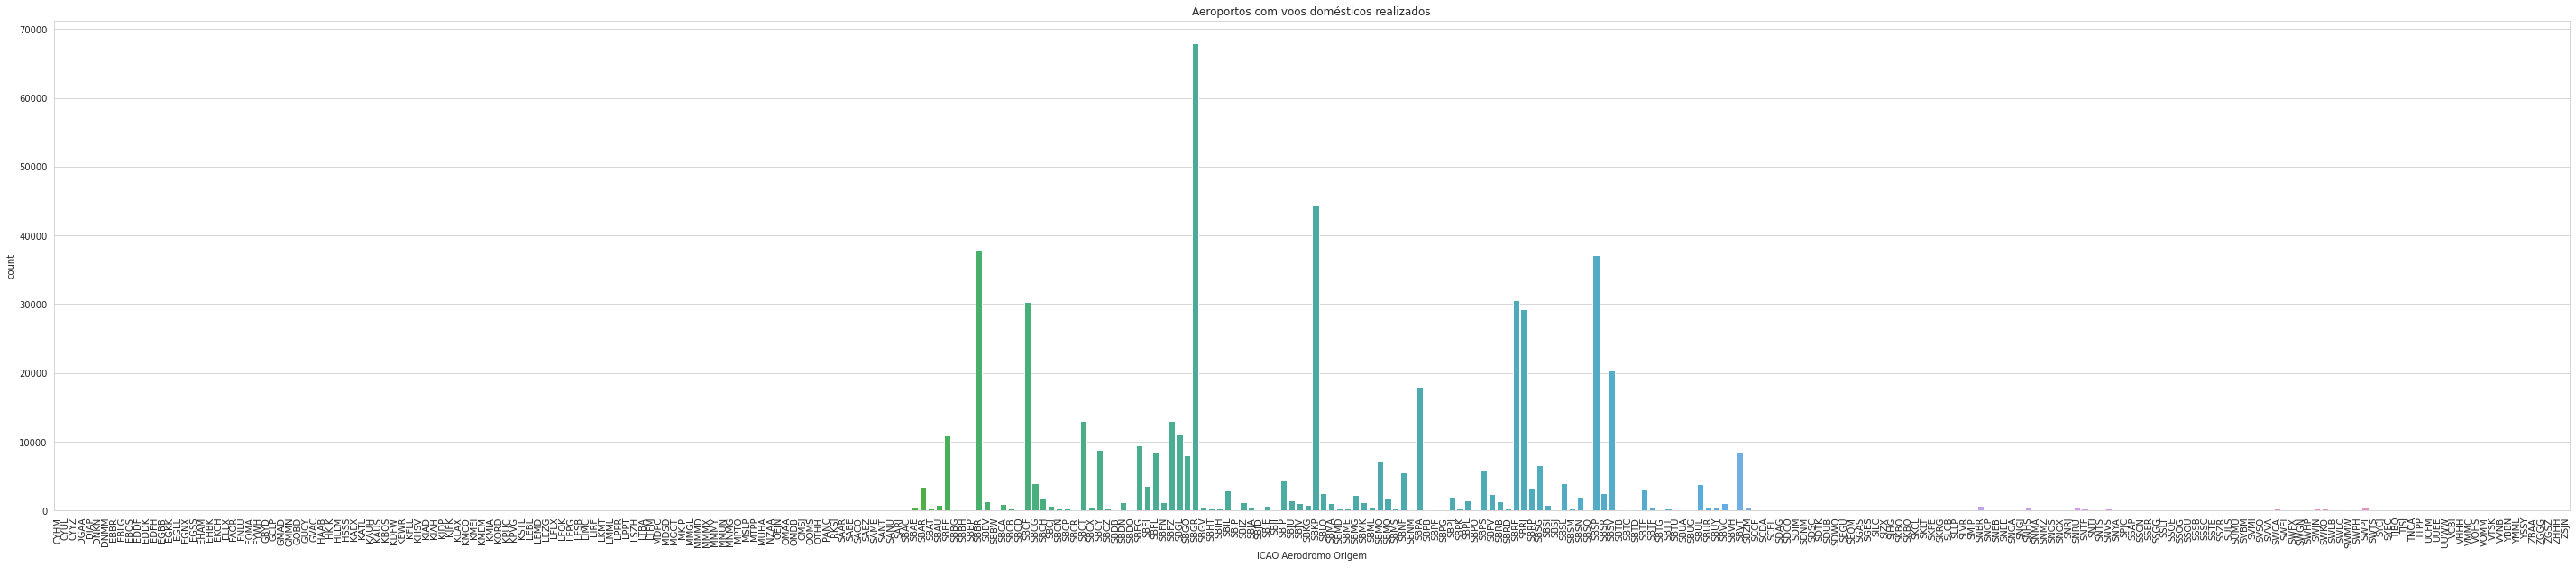

In [ ]:
anac_annual_df_sb_realizado = anac_annual_df[(anac_annual_df['Codigo Tipo Linha'] == 'N') & (anac_annual_df['Situacao Voo']=='REALIZADO')]

plt.figure(figsize=(50, 10))
ax = sns.countplot(x='ICAO Aerodromo Origem', data=anac_annual_df_sb_realizado)
ax.set_title('Aeroportos com voos domésticos realizados')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

plt.show()

Aerodromos Origem com mais voos realizados:

SBGR - Guarulhos (SP), BR

SBKP - Viracopos/Campinas (SP), BR

SBBR - BRASÍLIA (DF), BR

##Correlação entre Partida Prevista e Partida Real para voos realizados



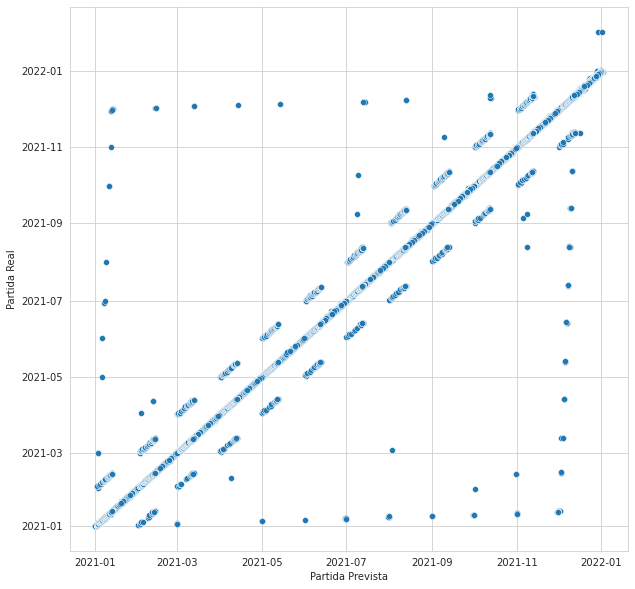

In [ ]:
realizado = anac_annual_df[anac_annual_df['Situacao Voo'] == 'REALIZADO']
compare_pp_pr = realizado[['Partida Prevista', 'Partida Real']]

plt.figure(figsize=(10, 10))
sns.scatterplot(data=compare_pp_pr, x='Partida Prevista', y='Partida Real')
plt.show()

##Correlação entre Chegada Prevista e Chegada Real para voos realizados

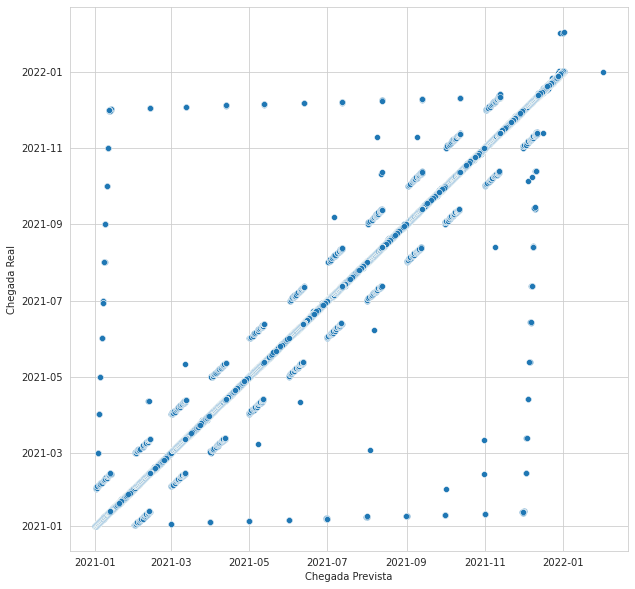

In [ ]:
compare_cp_cr = realizado[['Chegada Prevista', 'Chegada Real']]

plt.figure(figsize=(10, 10))
sns.scatterplot(data=compare_cp_cr, x='Chegada Prevista', y='Chegada Real')
plt.show()

Com base nesses dois últimos gráficos observamos que existe uma correlação positiva. Podendo afirmar que os voos que estavam sendo previstos corresponderam em sua maioria com a previsão real.

##Dias da semana com mais voos realizados

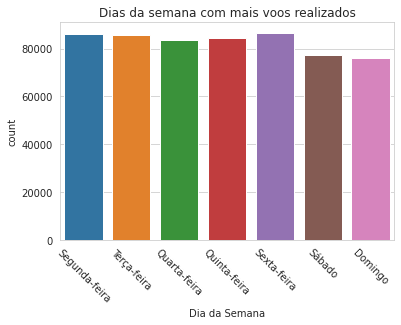

In [ ]:
ax = sns.countplot(x='DOW_PR', data=anac_annual_df)
ax.set_title('Dias da semana com mais voos realizados')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Dia da Semana")

plt.show()

##Dias da semana com mais voos cancelados

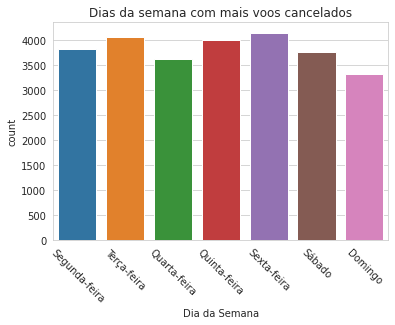

In [ ]:
ax = sns.countplot(x='DOW_PP', data=anac_annual_df[anac_annual_df['Situacao Voo'] == 'CANCELADO'])
ax.set_title('Dias da semana com mais voos cancelados')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Dia da Semana")

plt.show()

Assim concluímos com o que foi visto que:

1.   Nos primeiros meses houve uma queda do número de voos e posterior aumento, com destaque para o mês de dezembro. Isso pode ser relacionado com o valor do combustível, onde foi visto um aumento também no início do ano de 2021; Juntamente com o período de lockdown nesses meses, onde os voos foram restringidos.
2.   Em relação a Situação do Voo foi visto que no ano de 2021 houveram aproximadamente 600.000 voos Realizados e os Cancelados numa faixa menor que 50.000 voos.
3.   As CIAs que mais se destacaram em número de voos Realizados foram: AZUL e GOL; Esse valor foi proporcional ao número também de cancelamentos entre elas. Destaque também para a TAM em seu número de voos Realizados.


